In [6]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 5]


In [2]:
def fetch_data_in_dataframe_form_from_file(file_path, column_name):
    
    data = pd.DataFrame(
        np.loadtxt(file_path),
        columns=column_names
    )    
    
    return df

def plot_CO(run, run_specific_title):
    
    column_name = "CO/C"
    plt.scatter(
        run["depth"], 
        run[column_name], 
        label=column_name
    )

    column_name = "C1"
    plt.scatter(
        run["depth"], 
        run[column_name], 
        label=column_name
    )


    column_name = "C2"
    plt.scatter(
        run["depth"], 
        run[column_name], 
        label=column_name
    )


    plt.xscale("log")
    plt.yscale("log")
    
    plt.xticks([1e14, 1e16, 1e18, 1e20, 1e22])
    plt.yticks([1e-3, 1e-2, 1e-1, 1e0])
    plt.xlim([1e13, 5e22])

    plt.grid(True)

    plt.legend()


    plt.xlabel("depth [cm]")
    plt.ylabel("Normalized ratio")

#     plt.title(f"hden: 1e2 cm^-3 -- metallicity: 1e0 Zsolar -- turbulence: 1 km/sec -- radius: 1e1.5 pc -- isrf: G0 (MW value) \n\n{run_specific_title}")
#     plt.title("hden2.00000_metallicity0.50000_turbulence0.00000_isrf0.50000_radius3.50000")
    plt.title(f"{run_specific_title}")

    plt.show()

    return None

In [8]:
base_file_path = "/scratch/m/murray/dtolgay/cloudy_runs/testing_clumping_factor"
file_name = "hden2.00000_metallicity0.50000_turbulence0.00000_isrf0.50000_radius3.50000"
base_file_path += f"/{file_name}"

column_names = [
    "depth",
    "Te",
    "Htot",
    "hden",
    "eden",
    "2H_2/H",
    "HI",
    "HII",
    "HeI",
    "HeII",
    "HeIII",
    "CO/C",
    "C1",
    "C2",
    "C3",
    "C4",
    "O1",
    "O2",
    "O3",
    "O4",
    "O5",
    "O6",    
    "H2O/O",
    "AV(point)",
    "AV(extend)",
    "Tau912",
] 
ext = ".ovr"

runs = {
    "cf_1" : {
        "title": "cf = 1",
        "file_path": f"{base_file_path}/cf1{ext}"
    },
    "cf_05" : {
        "title": "cf = 0.5",
        "file_path": f"{base_file_path}/cf05{ext}"
    },
    "cf_01" : {
        "title": "cf = 1e-1",        
        "file_path": f"{base_file_path}/cf01{ext}"
    },
    "cf_001" : {
        "title": "cf = 1e-2",        
        "file_path": f"{base_file_path}/cf001{ext}"
    },
    "cf_0001" : {
        "title": "cf = 1e-3",                
        "file_path": f"{base_file_path}/cf0001{ext}"
    }    
}

for key in list(runs.keys()):
    runs[key]["ovr"] = pd.DataFrame(np.loadtxt(runs[key]["file_path"]), columns=column_names)

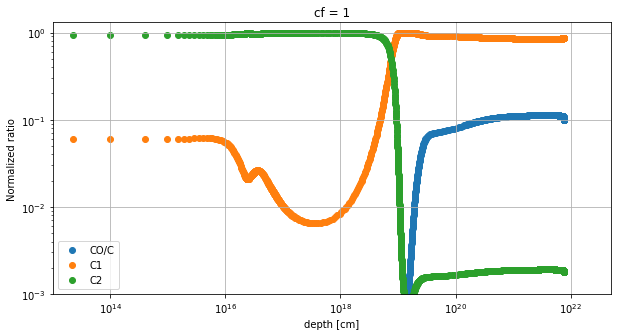

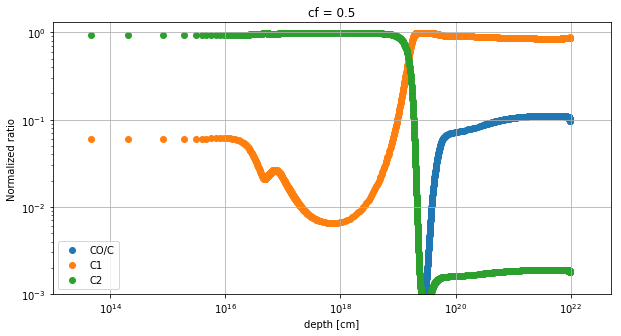

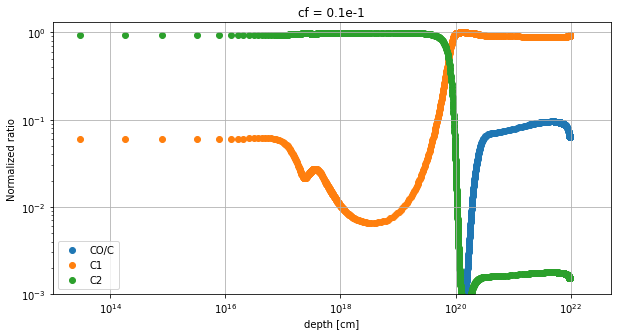

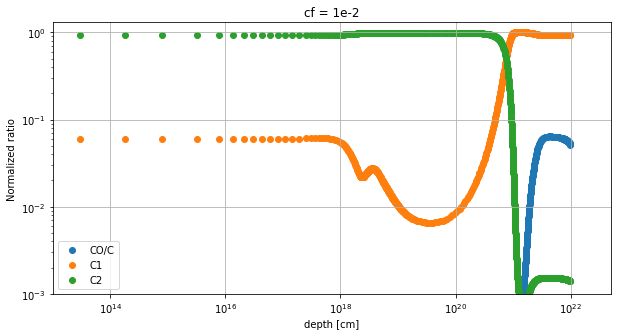

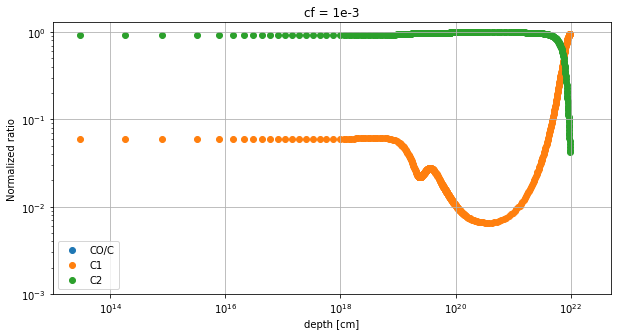

In [7]:
for key in list(runs.keys()):
    plot_CO(run = runs[key]["ovr"], run_specific_title=runs[key]["title"])
    
